In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [ ]:
# % cd '/content/drive/MyDrive/Data Mining/BSblocker'

# Scraping tweets containing keywords

In [ ]:
# import os
# !pip install snscrape

In [ ]:
import os
import snscrape.modules.twitter as sntwitter
import pandas as pd

def getFilteredTweets():
    text_query = '("grasso" OR "grassa" ' \
                 'OR "ciccione" ' \
                 'OR "culone" OR "nano" ' \
                 'OR "nana" OR "obeso" ' \
                 'OR "pelata" OR "pelato")'
    since_date = '2022-06-01'
    until_date = '2022-07-01'
    options = '-is:retweet -is:reply -is:quoted lang:it'
    output_file = './raw_Scraped/2022-06.csv'
    tweets_list = []
    fetched = 0

    print("output_file: ", output_file)

    for i, tweet in enumerate(
            sntwitter.TwitterSearchScraper(
                text_query + ' since:' + since_date + ' until:' + until_date + ' ' + options).get_items()):
        dfk = pd.read_csv("keys.txt", sep=';')

        Words = dfk['Words'].values
        for word in Words:
            if word in tweet.content:

                fetched = fetched+1

                tweets_list.append(
                    [tweet.date, tweet.content, tweet.user.username])

                if i % 100 == 0:
                    print("Tweets obtained: ", fetched, "\t\tdate: ", tweet.date)

                break

    tweets_df = pd.DataFrame(tweets_list,
                             columns=['datetime', 'text', 'username'])
    tweets_df.to_csv(output_file, index=False, sep=',')


def scrape():
    getFilteredTweets()


# Clean data before labeling

In [ ]:
import pandas as pd
import re

def clean():

    input_file = './raw_scraped/2022-06.csv'
    output_file = './cleaned/2022-06-cleaned.csv'

    # remove dup
    df = pd.read_csv(input_file, index_col=False, delimiter=",")
    df.drop_duplicates(subset=['text', 'username'])

    dfk = pd.read_csv("./keys.txt", sep=';')
    Words = dfk['Words'].values

    tweets_list = []
    how_many = 0
    found = 0


    # insert 'target' column
    df.insert(3, 'target', " ", allow_duplicates=True)
    df.to_csv(output_file, index=False, sep=',')

    for i in range(len(df)):

        # remove URLs and mentions
        df.at[i, 'text'] = re.sub(r"(?:\@|https?\://)\S+", '', df.at[i, 'text'], flags=re.MULTILINE)

        # remove new lines
        if df.at[i, 'text'].endswith("\n") or df.at[i, 'text'].endswith("\r"):
            df.at[i, 'text'] = df.at[i, 'text'].replace("\n", "").replace("\r", "")
        else:
            df.at[i, 'text'] = df.at[i, 'text'].replace("\n", " ").replace("\r", " ")

        # remove multiple spaces
        df.at[i, 'text'] = re.sub('\\s+', ' ', df.at[i, 'text'])

        # remove tweets without keywords
        for word in Words:

            found = 0

            if word in df.at[i, 'text'].lower():

                found = 1

                tweets_list.append(
                    [df.at[i, 'datetime'], df.at[i, 'text'], df.at[i, 'username'], df.at[i, 'target']])

                how_many = how_many + 1

                if i % 100 == 0:
                    print("Tweets filtered: ", how_many, "\t\tdate: ", df.at[i, 'datetime'])

                break
        if found == 0:
            print("Deleted: ", df.at[i, 'text'])

    tweets_df = pd.DataFrame(tweets_list, columns=['datetime', 'text', 'username', 'target'])
    tweets_df.to_csv(output_file, index=False, sep=',')
    print(tweets_df.shape)


## - Remove tweets with few occurences

In [ ]:
import os
import pandas as pd

def remove_few_occurences():
    
    data = pd.read_csv("./cleaned/2021-12-cleaned.csv")
    white_list = ["pelato", "pelata", "nano", "nana", "obeso", "obesa", "cozza",
                 "ciccione", "grasso", "grassa"]
    black_list = ["boiler", "anoressica", "anoressico", "cicciona", "nasone", 
                 "racchia", "culona", "obesa"]

    tweets_list = []
    black = False 
    white = False
    deleted = 0

    print(data.shape)

    for i in range(len(data)):

        if any(word in data.at[i, 'Text'].lower() for word in black_list):
            black = True
        if any(word in data.at[i, 'Text'].lower() for word in white_list):
            white = True

        if black and not white:
            deleted+=1
            #print(deleted)
            #print(data.at[i, 'Text'])
            continue
        else:
            tweets_list.append(
                [data.at[i, 'Datetime'], data.at[i, 'Text'], 
                 data.at[i, 'Username']])   

            #tweets_df.to_csv("./labeled/prova-2.csv", index=False, sep=',')
        black = False 
        white = False

    print(tweets_df.shape)
    print(deleted)
    tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text', 'Username'])
    tweets_df.to_csv("./cleaned/2021-12-filtered.csv", index=False, sep=',')

# Concat

## - Concat more files

In [ ]:
import pandas as pd
import glob
import os

def merge():
    # setting the path for joining multiple files
    files = os.path.join("./monitoring/", "*.csv")

    # list of merged files returned
    files = glob.glob(files)

    print("Resultant CSV after joining all CSV files at a particular location...");

    # joining files with concat and read_csv
    df = pd.concat(map(pd.read_csv, files), ignore_index=True)
    df.sort_values('datetime', inplace=True, ascending=True)
    print(df.shape)

    df.to_csv('./merged/monitoring.csv', index=False, sep=',')

## - Concat two files

In [ ]:
import pandas as pd

data1 = pd.read_csv()
data2 = pd.read_csv()

concate_data = pd.concat([data1,data2])

# Show data collected

## - Set filename

In [ ]:
file_name = './labeled/12-01-rebalanced.csv'

## - Details of a file

In [ ]:
# pip install pandas 
import pandas as pd

# Read the csv file
data = pd.read_csv(file_name)

# Print it out if you want
print(data.shape)
data.head

## - Class plot

In [ ]:
import pandas as pd
data = pd.read_csv('./labeled/12-01-rebalanced-only-labeled.csv', index_col=False, delimiter=",")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data['target'].value_counts().plot(kind='bar')
plt.xlabel("Label", labelpad=14)
plt.xticks(rotation=0)
plt.ylabel("Tweets", labelpad=14);
# plt.title("Training set", y=1.02);

plt.savefig('training set.png')

## - Histogram of a single file

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(file_name, index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['Datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y="count", data=data, zorder=2).set(title='Distribution of tweets') #plot using seaborn
plt.xticks(rotation=70)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [11,9]
plt.grid()

## - Bar charts

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")

# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  

ax = sns.barplot(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")
# plt.title('Distribution of tweets',fontsize=36,pad=30)
plt.xlabel('Time',fontsize=30,labelpad=24)
plt.ylabel('#Tweets',fontsize=30)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=26)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_barplot_days.png')

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')
# Plot
plt.bar(data['date_col'], data['count'], color="cornflowerblue")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
plt.savefig('./monitoring/monitoring_barplot.png')
plt.show()

## - Find peaks

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


input_file = './merged/cleaned.csv'
dataset = pd.read_csv(input_file)
dataset = dataset.groupby(dataset['datetime'].astype('datetime64').dt.to_period('d')).size().reset_index(name='counts')
dataset["datetime"]= dataset["datetime"].dt.strftime('%Y-%m-%d')
dataset = dataset.iloc[:, ::-1]

res = dataset[(dataset['counts'] > 800) & (dataset['datetime'] > '2022-03-01')]
print(res)

peaks = {}
for index, row in res.iterrows():
    peaks[row['datetime']] = row['counts']
print(peaks)
Discarded = ['2022-03-14', '2022-03-19', '2022-03-24']
for peak in Discarded:
    peaks.pop(peak)
print(peaks)

ax = plt.plot(dataset['datetime'], dataset['counts'])
plt.xticks(rotation=70)
plt.tight_layout()
plt.rcParams["figure.figsize"] = [50,20]
plt.grid()

## - Peaks highlighted

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)


# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')
data.set_index("date_col")

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots()
# bars = ax.bar(x="date_col", y=data["count"], data=data, zorder=2, color="cornflowerblue")

barlist = plt.bar(data['date_col'], data['count'], color="cornflowerblue")

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid(zorder=2)
# plt.subplots_adjust(bottom=0.55)

print(peaks)

for peak in peaks.keys():
    print(peak)
    p = datetime.strptime(peak, '%Y-%m-%d')
    i = data[data['date_col'] == peak].index[0]
    row = data[data['date_col'] == peak]
    ts = row.iloc[0]['date_col']
    s = ts.strftime('%Y-%m-%d')
    plt.text(ts,-300, s, fontsize=24, rotation=90)
    barlist[i].set_color('salmon')
    

plt.savefig('./monitoring/img/monitoring_barplot_peaks.png', bbox_inches='tight')
plt.show()


## - Line chart

In [ ]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.read_csv('./merged/monitoring.csv', index_col=False, delimiter=",")
# get only month and year from datetime column (date of exam)
df['date_col'] = df['datetime'].astype('datetime64').dt.to_period('D') # D = day, M = month, Y = year
print(df.shape)

# group by based on month and year after filtering poor graded students
data = df.groupby(['date_col']).size().reset_index(name = 'count')  
data['date_col'] = data['date_col'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d')
data['date_col'] = pd.to_datetime(data['date_col'], format='%Y-%m-%d')


# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(data['date_col'], data['count'], color="cornflowerblue")
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
# Labels
# plt.title('Distribution of tweets',fontsize=36,pad=30)
# plt.xlabel('Time',fontsize=30,labelpad=50)
plt.ylabel('#Tweets',fontsize=36,labelpad=26)
#Ticks
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)
plt.tick_params(axis='y', pad=10)
plt.tick_params(axis='x', pad=10)

plt.margins(x=0)    # delete graph lateral margin
plt.ylim(ymin=0)    # y values start from 0
plt.tight_layout()
plt.rcParams["figure.figsize"] = [28,9]
plt.grid()
plt.savefig('./monitoring/monitoring_lineplot.png')
plt.show()

## - Frequency of words

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

df = pd.read_csv('./labeled/12-01-rebalanced.csv')

dfa = df['text']
dfb = pd.read_csv("keys.txt", sep=';')

Words = dfb['Words'].values
dico = {}
for word in Words:
    dico[word] = dfa.str.count(word).sum()

print(dico)

#plt.bar(dico.keys(), dico.values(), width, color='g')

words = list(dico.keys())
count = list(dico.values())
    
plt.barh(words,count)
plt.title('Word occurences')
plt.ylabel('Keywords')
plt.xlabel('Count')
plt.show()

## - Extract labeled tweets

In [ ]:
import pandas as pd

def extract_labeled(in_file, out_file):

    df = pd.read_csv(in_file, index_col=False, delimiter=",")

    tweets_list = []
    print(df.shape)

    labeled = df[(df.target == '0') | (df.target == '1')]
    labeled.to_csv(out_file, index=False, sep=',')

    return (labeled.shape)

## - Verify balanced classes

In [ ]:
import pandas as pd
data = pd.read_csv('./labeled/12-01-rebalanced-only-labeled.csv', index_col=False, delimiter=",")

tot0 = data.query("target == 0").shape[0]
tot1 = data.query("target == 1").shape[0]

print("Tot 0 --> ", tot0)
print("Tot 1 --> ", tot1)

# Preprocessing

## - Remove punctuation marks, brackets, quotes, special characters

In [ ]:
import string

def remove_punctuation(text):
    text = "".join([i for i in str(text) if i not in string.punctuation])
    text = text.replace('\u201D', " ")
    text = text.replace('\u2018', " ")
    text = text.replace('\u2019', " ")
    text = text.replace('\u201c', " ")
    text = text.replace('\u2026', " ")
    text = re.sub(r'\.{2,}', ' ', text)

    return text

## - Text reformat

In [ ]:
import re
def text_reformat(text):
    # remove two or more dots
    text = re.sub(r'\.{2,}', ' ', text)
    # remove two or more letters: { bellooooo -> bello}
    text = re.sub(r'(.)\1+', r'\1\1', text)

    return text.lower()

## - Remove emoticons

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
                      u"\U0001F600-\U0001F64F"  # emoticons
                      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                      u"\U0001F680-\U0001F6FF"  # transport & map symbols
                      u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                      u"\U00002500-\U00002BEF"  # chinese char
                      u"\U00002702-\U000027B0"
                      u"\U00002702-\U000027B0"
                      u"\U000024C2-\U0001F251"
                      u"\U0001f926-\U0001f937"
                      u"\U00010000-\U0010ffff"
                      u"\u2640-\u2642"
                      u"\u2600-\u2B55"
                      u"\u200d"
                      u"\u23cf"
                      u"\u23e9"
                      u"\u231a"
                      u"\ufe0f"  # dingbats
                      u"\u3030"
                      "]+", re.UNICODE)

    return re.sub(emoj, '', data)

## - Preprocessing call

In [ ]:
def preprocessing_steps(data):
    new_data = remove_punctuation(data)
    new_data = text_reformat(new_data)
    new_data = remove_emojis(new_data)

    return new_data


def preprocess(data):

    array = []

    for index, tweet in data.iterrows():

        # print(tweet['Text'])
        new_data = preprocessing_steps(tweet['text'])
        array.append(new_data)
        # print(new_data, "\n")

    data['text'] = array

    print("Preprocessing done")

    return data

# Elaboration

## - Stopwords removal

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize


def remove_stopwords(tokens):
    # nltk.download('stopwords')
    stop_words = set(stopwords.words('italian'))
    
    return [i for i in tokens if i not in stop_words]

## - Stemming

In [ ]:
from nltk.stem import SnowballStemmer

def stem(tokens):
    # the stemmer requires a language parameter
    snow_stemmer = SnowballStemmer(language='italian')

    return [snow_stemmer.stem(word) for word in tokens]

## - Remove miningless words

In [ ]:
def miningfull_words(stemmed):
    return [word for word in stemmed if len(word) > 2]

## - Remove features with numbers

In [ ]:
def remove_numbers(mean_words):
    return [word for word in mean_words if not word.isdigit()]

## - Elaboration call

In [ ]:
from nltk.tokenize import word_tokenize

def textual(text):
    tweets = ""
    for word in text:
        tweets += word + " "

    return tweets


def elaborating_steps(t):
    # print(t)

    tokens = word_tokenize(t)
    # print(tokens)
    tokens = remove_stopwords(tokens)
    # print(tokens)
    stemmed_words = stem(tokens)
    # print(stemmed_words)
    mean_words = miningfull_words(stemmed_words)
    # print(mean_words)
    numbers_removed = remove_numbers(mean_words)
    # print(numbers_removed)
    # print("\n")

    elaborated_tweet = ""
    for word in numbers_removed:
        elaborated_tweet += word + " "

    return elaborated_tweet


def elaborate(data):

    elaborated = []

    for index, tweet in data.iterrows():

        # print(tweet['text'])
        new_tweet = elaborating_steps(tweet['text']).strip()
        elaborated.append(new_tweet)
        data.at[index, 'text'] = new_tweet

    # print(elaborated)
    data = data.sort_values(by='datetime')

    print("Elaboration done")
    print("\n")

    return data

# Model training

In [ ]:
!pip install dataframe_image
!pip install --upgrade pip
!pip install selenium
!pip install -U scikit-learn

In [ ]:

from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2, SelectPercentile

# import classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier

# model selection and metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import sklearn.metrics as metrics

# import plot libs
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
import dataframe_image as dfi

import time
import pickle

#from selenium import webdriver
#driver = webdriver.Chrome("C:/Users/marti/Downloads/chromedriver_win32/chromedriver.exe")


rounds = 10
folds = 10
perc = "85"
path = "models_result/"+perc+"/"


def t_stat_interpret(t):
    """
    Takes a scalar and returns a string with
    the css property `'color: yellow'` for queue values, white otherwise.
    """

    # degrees of freedom
    p = 0.05
    df = rounds - 1
    t_table = pd.read_csv("./t_distribution_table.csv")
    c = float(t_table.loc[df, str(round(p / 2, 3))])

    if t == "":
        color = 'white'
    else:
        #color = 'white' if t > c or t < -c else 'yellow'
        color = 'pink' if t > c or t < -c else 'lightgreen'
    return 'background: % s' % color


def scoring(pipeline, data, labels, iter):
    results_10CV = []

    # start iter
    for i in range(1, iter + 1):
        X, y = shuffle(data, labels, random_state=i * 42)
        results_10CV.append(np.mean(cross_val_score(estimator=pipeline,
                                                    X=X,
                                                    y=y,
                                                    cv=10,
                                                    n_jobs=-1
                                                    )))

    return results_10CV


# ------------------------ 10-fold cross validation ------------------------

def cross_validation(models, tweets, targets):

    # properties for new dataframe
    idx = (model['name'] for model in models)
    cols = ['Accuracy', 'Execution time', 'Std']
    cvs = pd.DataFrame(np.zeros((11, 3)), columns=cols, index=idx)
    # cm variable by the color palette from seaborn
    cm = sns.light_palette("seagreen", as_cmap=True)
    cs = sns.light_palette("royalblue", as_cmap=True)

    for model in models:
        start = time.time()

        model['pipeline'] = Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 1))),
                                            ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True)),
                                            ('fselect', SelectPercentile(chi2, percentile=int(perc))),
                                            ('clf', model['fun'])])

        model['values'] = scoring(model['pipeline'], tweets, targets, rounds)

        end = time.time()

        cvs.loc[model['name']] = [float(("%.6f" % np.mean(model['values'])).rstrip('0').rstrip('.')), \
                                  str(round((end - start),4))+" s", \
                                  float("%.6f" % np.std(model['values']))]
        cvs.sort_values('Accuracy', inplace=True, ascending=False)

    print("\nCross validation results:\n")
    cvs.to_csv(path+"training_result_"+perc+"/cross_val_result.csv")
    
    cvs = cvs.style.background_gradient(cmap=cm, subset=['Accuracy'])\
                   .background_gradient(cmap=cs, subset=['Std'])
    dfi.export(cvs, path+"training_result_"+perc+"/cross_val_result.png")
    display(HTML(cvs.to_html()))

    # discarded for execution time
    discarded = ["Bagging", "Random Forest", "Gradient Boosting"]
    # discarded for accuracy
    discarded.extend(["K Nearest", "Decision Tree", "Ada Boost", \
                      "Stochastic Gradient"])
    return discarded

# ----------------- t-test evaluation from library -------------------------

def t_test(models_selected):

    all_t_stat = []

    i = 0
    j = 0
    for model in models_selected:
        row = []
        i += 1
        j = 0
        for another_model in models_selected:
            j += 1
            if (j < i + 1):
                row.append("")
                continue
            t_statistic, p_value = stats.ttest_rel(model['values'], \
                                                   another_model['values'])
            # print(t_statistic, p_value)
            row.append(t_statistic)

        all_t_stat.append(row)

    print("\nT-test results:\n")

    ttest_matrix = pd.DataFrame(all_t_stat, 
                                columns=(model['name'] for model in models_selected),
                                index=(model['name'] for model in models_selected))
    #delete empty column and row
    del ttest_matrix['Logistic Regression']
    ttest_matrix.drop(ttest_matrix.tail(1).index,inplace=True)
    
    ttest_matrix.to_csv(path+"training_result_"+perc+"/t_test_result.csv")
    ttest_matrix = ttest_matrix.style.applymap(t_stat_interpret)
    dfi.export(ttest_matrix, path+"training_result_"+perc+"/t_test_result.png")
    display(HTML(ttest_matrix.to_html()))

    discarded = []
    discarded.append("MultinomialNB")

    return discarded


# ---------------------- report and confusion matrix ----------------------- 

def get_report_conf_matrix(models, tweets, targets):

    print("\nReport and confusion matrix")

    for model in models:
        
        print(model['name'])
        predict = cross_val_predict(model['pipeline'], tweets, targets, cv=10)
        rep = metrics.classification_report(targets, predict,
                                            target_names=['0', '1'])
        print(rep)
      
        # save report
        rep = metrics.classification_report(targets, predict,
                                    target_names=['0', '1'], output_dict=True)
        df = pd.DataFrame(rep)
        df.to_csv(path+'training_result_'+perc+'/'+model['name']+'-report.csv')
        
        # calculate and print confusion matrix
        disp = ConfusionMatrixDisplay.from_predictions(
            targets,
            predict,
            values_format='g',
            display_labels=[0,1],
            cmap=plt.cm.Blues
        )
        disp.ax_.set_title("Confusion matrix")

        print(disp.confusion_matrix)
        disp.figure_.savefig(path+'training_result_'+perc+'/'+model['name']+'-confusion_matrix.png')
        
        print("\n")


def train_models(data):

    data.sample(frac=1)

    tweets = data.text
    targets = data.target


    # models = name | fun | pipeline | values |
    models = [
        {"name": "Logistic Regression", "fun": LogisticRegression()},
        {"name": "SVM", "fun": svm.SVC()},
        {"name": "Decision Tree", "fun": DecisionTreeClassifier()},
        {"name": "MultinomialNB", "fun": MultinomialNB()},
        {"name": "Gradient Boosting", "fun": GradientBoostingClassifier()},
        {"name": "ComplementNB", "fun": ComplementNB()},
        {"name": "K Nearest", "fun": KNeighborsClassifier()},
        {"name": "Random Forest", "fun": RandomForestClassifier()},
        {"name": "Ada Boost", "fun": AdaBoostClassifier()},
        {"name": "Bagging", "fun": BaggingClassifier()},
        {"name": "Stochastic Gradient", "fun": SGDClassifier()}
    ]

    # analyze classifiers

    discarded = cross_validation(models, tweets, targets)

    models_selected = [s for s in models if s['name'] not in discarded]

    discarded = t_test(models_selected)

    models_selected = [s for s in models_selected if s['name'] not in discarded]

    get_report_conf_matrix(models, tweets, targets)


    # models building

    for model in models_selected:
      
        m = model['pipeline'].fit(tweets, targets)
        
        # save models
        filename = model['name'] + '.sav'
        pickle.dump(m, open(path+'models_'+perc+'/'+filename, 'wb'))

    print("\nModels correctly saved!")


# Training flow

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
import pandas as pd
import nltk
from IPython.display import HTML
from sklearn.feature_extraction.text import CountVectorizer


if __name__ == '__main__':
    
    training_set_file = 'labeled/12-01-rebalanced-only-labeled.csv'
    train_data = pd.read_csv(training_set_file, index_col=False, delimiter=",")

    train_data = preprocess(train_data)
    train_data = elaborate(train_data)

    # print(train_data.shape)
    #tot0 = len(train_data[train_data.target == '0'])
    #tot1 = len(train_data[train_data.target == '1'])

    train_models(train_data)

# Model testing

In [ ]:
from sklearn.utils import shuffle
import time
import numpy as np
import pandas as pd
from scipy import stats
import pickle

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2, SelectPercentile

# import classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier

# model selection and metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay

# import plot libs
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML


def test_models(data):

    tweets = data['text']
    targets = data['target']

    models = [
        {"name": "Logistic Regression", "fun": LogisticRegression()},
        {"name": "SVM", "fun": svm.SVC()},
        {"name": "ComplementNB", "fun": ComplementNB()}
    ]

    # load the model from disk
    for model in models:

        loaded_model = pickle.load(open(path+'models_'+perc+'/'+model['name']+'.sav', 'rb'))
        print(model['name'])
        score = loaded_model.score(tweets, targets)
        print("Test score: {0:.2f} %".format(100 * score))
        y_predict = loaded_model.predict(tweets)

        rep = classification_report(targets, y_predict,
                                              target_names=['0', '1'])
        print(rep, '\n')

        # save reports
        rep = classification_report(targets, y_predict,
                                    target_names=['0', '1'], output_dict=True)
        df = pd.DataFrame(rep).transpose()
        df.to_csv(path+'test_result_'+perc+'/'+model['name']+'-report.csv')


# Test flow

In [ ]:
import pandas as pd
import nltk
from IPython.display import HTML
from sklearn.feature_extraction.text import CountVectorizer

if __name__ == '__main__':
    
    test_set_file = './labeled/2022-02-labeled-only.csv'
    test_data = pd.read_csv(test_set_file, index_col=False, delimiter=",")
    
    test_data = preprocess(test_data)
    test_data = elaborate(test_data)

    # print(test_data.shape)
    #tot0 = len(train_data[test_data.target == '0'])
    #tot1 = len(train_data[test_data.target == '1'])

    test_models(test_data)
    #we consider just yellow -> null hp non rejected -> similar to each other -> best Complement e Logistic? Migliori accuracy e execution time

# Online monitoring

## - Extract peaks

In [ ]:
import pandas as pd
import datetime
import time

# 2022-03-10
# 2022-04-09
# 2022-06-18

df = pd.read_csv('./cleaned/2022-03-cleaned.csv', index_col=False, delimiter=",")

end_peak = '2022-03-10 23:59:59+00:00'
start_peak = '2022-03-10 00:00:00+00:00'
start = time.strptime(start_peak, "%Y-%m-%d %H:%M:%S+00:00")
end = time.strptime(end_peak, "%Y-%m-%d %H:%M:%S+00:00")
peak = df[(df['datetime'] > start_peak) & (df['datetime'] < end_peak)]

peak.to_csv('./monitoring/period1.csv', index=False, sep=',')


df = pd.read_csv('./cleaned/2022-04-cleaned.csv', index_col=False, delimiter=",")

end_peak = '2022-04-09 23:59:59+00:00'
start_peak = '2022-04-09 00:00:00+00:00'
start = time.strptime(start_peak, "%Y-%m-%d %H:%M:%S+00:00")
end = time.strptime(end_peak, "%Y-%m-%d %H:%M:%S+00:00")
peak = df[(df['datetime'] > start_peak) & (df['datetime'] < end_peak)]

peak.to_csv('./monitoring/period2.csv', index=False, sep=',')


df = pd.read_csv('./cleaned/2022-06-cleaned.csv', index_col=False, delimiter=",")

end_peak = '2022-06-18 23:59:59+00:00'
start_peak = '2022-06-18 00:00:00+00:00'
start = time.strptime(start_peak, "%Y-%m-%d %H:%M:%S+00:00")
end = time.strptime(end_peak, "%Y-%m-%d %H:%M:%S+00:00")
peak = df[(df['datetime'] > start_peak) & (df['datetime'] < end_peak)]

peak.to_csv('./monitoring/period4.csv', index=False, sep=',')

print("Peaks extracted ")

# Concept drift

## - Static model

In [ ]:
import time
import numpy as np
import pandas as pd
import pickle

from sklearn.naive_bayes import ComplementNB

# model selection and metrics
from sklearn.metrics import classification_report


path = "models_result/85/"
res = './monitoring/concept_drift/static/'

def static_cd_test(data, peak):

    tweets = data['text']
    targets = data['target']

    model = {'name': 'ComplementNB', 'fun': ComplementNB()}
 
    loaded_model = pickle.load(open(path+'models_85/'+model['name']+'.sav', 'rb'))
    print(model['name'])
    score = loaded_model.score(tweets, targets)
    print("Test score: {0:.2f} %".format(100 * score))
    y_predict = loaded_model.predict(tweets)

    rep = classification_report(targets, y_predict,
                                          target_names=['0', '1'])
    print(rep, '\n')

    # save reports
    rep = classification_report(targets, y_predict,
                                target_names=['0', '1'], output_dict=True)
    df = pd.DataFrame(rep).transpose()
    if peak == 'may':
        df.to_csv(res+peak+'-report.csv')
    else:
        df.to_csv(res+'period'+peak+'-report.csv')

In [ ]:
import pandas as pd
import string

if __name__ == '__main__':
    
    peaks = ['period-1-labeled',
             'period-2-labeled',
             'period-3-labeled',
             'period-4-labeled']
    
    i = 0
    for peak in peaks:
        
        i+=1
        
        #lab = extract_labeled('./labeled/'+peak+'.csv', './labeled/'+peak+'-only.csv')
        #print(lab)
        test_set_file = './monitoring/'+peak+'-only.csv'
        test_data = pd.read_csv(test_set_file, index_col=False, delimiter=",")

        test_data = preprocess(test_data)
        test_data = elaborate(test_data)

        if(peak == peaks[2]):
            static_cd_test(test_data, 'may')
            i = 2
            continue
        else:
            print(i)
            static_cd_test(test_data, str(i))

## - Training function for sliding and incremental

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile

def cd_training(path, data, peak, c):

    tweets = data.text
    targets = data.target

    model = {'name': 'ComplementNB', 'fun': ComplementNB()}

    # model building
    model['pipeline'] = Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 1))),
                                ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True)),
                                ('fselect', SelectPercentile(chi2, percentile=85)),
                                #('fselect', SelectKBest(chi2, k='all')),      
                                ('clf', model['fun'])])

    m = model['pipeline'].fit(tweets, targets)
    
    print(len(model['pipeline']['vect'].vocabulary_))
    
    # save model
    if c =='i':
        filename = model['name']+'_period'+str(i)+'.sav'
    elif c == 's':
        filename = model['name']+'_slide'+str(i)+'.sav'
    
    pickle.dump(m, open(path+'/'+filename, 'wb'))

    print("\nModel correctly saved!\n")
    print('─' * 10)

## - Incremental model

In [ ]:
import time
import numpy as np
import pandas as pd
import pickle

from sklearn.naive_bayes import ComplementNB

# model selection and metrics
from sklearn.metrics import classification_report

path = './monitoring/concept_drift/incremental/'

        
def incremental_cd_test(path, data, i):

    tweets = data['text']
    targets = data['target']

    model = {"name": "ComplementNB", "fun": ComplementNB()}
    print("./monitoring/concept_drift/incremental/"+model['name']+'_period'+str(i)+'.sav')
    
    loaded_model = pickle.load(open(path+model['name']+'_period'+str(i)+'.sav', 'rb'))
    score = loaded_model.score(tweets, targets)
    print("Test score: {0:.2f} %".format(100 * score))
    y_predict = loaded_model.predict(tweets)

    rep = classification_report(targets, y_predict,
                                          target_names=['0', '1'])

    print(rep, '\n')
    # save reports
    rep = classification_report(targets, y_predict,
                                target_names=['0', '1'], output_dict=True)
    
    df = pd.DataFrame(rep).transpose()
 
    df.to_csv(path+"period"+str(i+1)+'-report.csv')
    
    

In [ ]:
import pandas as pd
import string

from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2, SelectPercentile

path = "./monitoring/concept_drift/incremental/"
external_path = "./monitoring/"

def get_period(i, peak):
    #match i:
        #case 1:
        print("peak:" +peak)
        if i == 0:
            data1 = external_path+"12-01-rebalanced-only-labeled.csv"
            data2 = external_path+"2022-02-labeled-only.csv"
            df1 = pd.read_csv(data1)
            df2 = pd.read_csv(data2)
            df = pd.concat([df1,df2])
            df.sort_values('datetime', inplace=True, ascending=True)
            df.to_csv(path+'peak'+str(i)+".csv", index=False)
            print(df.shape)
            return df
        elif i > 0 and i < 4:
            data1= path+"peak" + str(i-1)+".csv"
            data2 = external_path+peak+'-only.csv'
            df1 = pd.read_csv(data1)
            df2 = pd.read_csv(data2)
            df = pd.concat([df1,df2])
            df.sort_values('datetime', inplace=True, ascending=True)
            df.to_csv(path+'peak'+str(i)+".csv", index=False)
            print(df.shape)
            print(data1, data2)
            return df 
        #case _:
        else:
            return None

if __name__ == '__main__':
    
    peaks = ['period-1-labeled',
             'period-2-labeled',
             'period-3-labeled',
             'period-4-labeled']

    i = 0
    for peak in peaks:
        
        # training
        training_set_file = get_period(i, peaks[i-1])
        training_data = preprocess(training_set_file)
        training_data = elaborate(training_data)
        cd_training(path,training_set_file, peak, 'i')
        
        # test
        
        test_set_file = './monitoring/'+peak+'-only.csv'
        test_data = pd.read_csv(test_set_file, index_col=False, delimiter=",")

        test_data = preprocess(test_data)
        test_data = elaborate(test_data)
        
        incremental_cd_test(path, test_data, i)
        
       
        i+=1
        

## - Sliding model

In [ ]:
import time
import numpy as np
import pandas as pd
import pickle

from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import chi2, SelectPercentile

# model selection and metrics
from sklearn.metrics import classification_report

    
def sliding_cd_training(path, data, i):

    tweets = data.text
    targets = data.target
    
    model = {'name': 'ComplementNB', 'fun': ComplementNB()}

    # model building
    model['pipeline'] = Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 1))),
                                ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True)),
                                ('fselect', SelectPercentile(chi2, percentile=85)),
                                ('clf', model['fun'])])

    m = model['pipeline'].fit(tweets, targets)
    # save model
    filename = model['name']+'_slide'+str(i)+'.sav'
    pickle.dump(m, open(path+'/'+filename, 'wb'))

    print("\nModel correctly saved!\n")
    print('─' * 10)
    

def sliding_cd_test(path, data, i):

    tweets = data['text']
    targets = data['target']

    loaded_model = pickle.load(open(path+model['name']+'_slide'+str(i)+'.sav', 'rb'))
    
    score = loaded_model.score(tweets, targets)
    print("Test score: {0:.2f} %".format(100 * score))
    y_predict = loaded_model.predict(tweets)

    rep = classification_report(targets, y_predict,
                                          target_names=['0', '1'])
    print(rep, '\n')

    # save reports
    rep = classification_report(targets, y_predict,
                                target_names=['0', '1'], output_dict=True)
    df = pd.DataFrame(rep).transpose()
    df.to_csv(path+'slide'+str(i)+'-report.csv')

In [ ]:
import pandas as pd
import string

path = './monitoring/concept_drift/sliding/'

def create_slide(i, file1, file2):

    df1 = pd.read_csv(file1, index_col=False, delimiter=",")
    data2 = pd.read_csv(file2, index_col=False, delimiter=",")
    df1.sort_values('datetime', inplace=True, ascending=True)
    data2.sort_values('datetime', inplace=True, ascending=True)
    
    print(df1.shape)
    if i == 1:
        data1 = df1.tail(-176)
    else:
        data1 = df1.tail(-80)
    print(data1.shape)
    print(data2.shape)
    slide = pd.concat([data1,data2]) #slide
    print(slide.shape)
    #slide.sort_values('datetime', inplace=True, ascending=True)
    slide_name = path+'slide'+str(i)+'.csv'
    slide.to_csv(slide_name, index=False)
    
    return slide_name, slide

    
def get_files(i):
    
    list = []
    j = i-1
    if i == 1:
        list.append('monitoring/12-01-rebalanced-only-labeled.csv')
        list.append('monitoring/2022-02-labeled-only.csv')
        
    else: # 2 3 4 5
        list.append(path+'slide'+str(j)+'.csv')
        list.append('monitoring/period-'+str(j)+'-labeled-only.csv')
    
    return list

if __name__ == '__main__':

    model = {"name": "ComplementNB", "fun": ComplementNB()}
                    
    
    for i in range(1,6):
           
        # create slide
        
        list = get_files(i)  # old and new tweets
        print(list)
        file1 = list[0]
        file2 = list[1]
        slide_name, slide = create_slide(i, file1, file2)
        print(slide_name, "\n")

        #train on slide
                                
        training_data = preprocess(slide)
        training_data = elaborate(training_data)
        
        cd_training(path, training_data, i, 's')
        
        # test on next month
        
        if i < 5:
        
            test_set_file = './labeled/period-'+str(i)+'-labeled-only.csv'
            test_data = pd.read_csv(test_set_file, index_col=False, delimiter=",")

            test_data = preprocess(test_data)
            test_data = elaborate(test_data)

            cd_test(path, test_data, i, 's') 

# - Comparing learning models

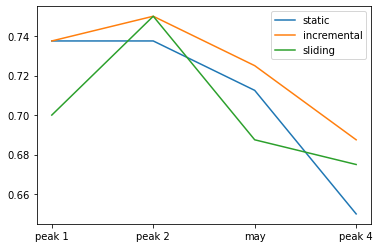

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path_file = './monitoring/concept_drift/'
peaks = []
i = 0
static_values = []
incremental_values = []
sliding_values = []
for i in range (0,4):
    static = pd.read_csv(path_file+"static/period"+str(i+1)+"-report.csv")
    incremental = pd.read_csv(path_file+"incremental/interval"+str(i+1)+"-report.csv")
    sliding = pd.read_csv(path_file+"sliding/slide"+str(i+1)+"-report.csv")
    static_values.append(static['precision'][2])
    incremental_values.append(incremental['precision'][2])
    sliding_values.append(sliding['precision'][2])
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    i+=1
plt.plot(peaks, static_values, label="static")
plt.plot(peaks, incremental_values, label="incremental")
plt.plot(peaks, sliding_values, label="sliding")
plt.legend()
plt.savefig('./monitoring/img/accuracy_for_model.png')

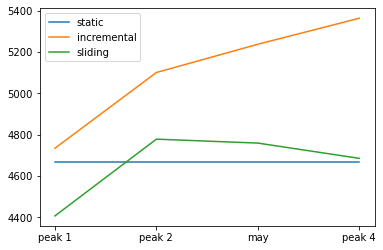

In [3]:
import pickle
static_path = './models_result/85/models_85/'
incremental_path = './monitoring/concept_drift/incremental/'
sliding_path='./monitoring/concept_drift/sliding/'
i=0
incremental = []
sliding = []
static = []
peaks = []

while i in range(0,4):
    incremental_model = pickle.load(open(incremental_path+"ComplementNB_interval" + str(i+1) + ".sav", 'rb'))
    incremental.append(len(incremental_model['vect'].vocabulary_))
    sliding_model = pickle.load(open(sliding_path+"ComplementNB_slide" + str(i+1) + ".sav", 'rb'))
    sliding.append(len(sliding_model['vect'].vocabulary_))
    if i == 2:
        peaks.append('may')
    else:
        peaks.append("peak "+str(i+1))
    static_model = pickle.load(open(static_path+"ComplementNB.sav", 'rb'))
    static.append(len(static_model['vect'].vocabulary_))
    i+=1
    
plt.plot(peaks, static, label="static")
plt.plot(peaks, incremental, label="incremental")
plt.plot(peaks, sliding, label="sliding")
plt.legend()
plt.savefig('./monitoring/img/features_for_model.png')